# Classification de patients souffrant d’un cancer

Avec environ 54 062 nouvelles personnes touchées chaque année, le cancer du sein est le plus répandu des cancers féminins mais également masculin. Près d'une femme sur neuf sera concernée au cours de sa vie, le risque augmentant avec l'âge. Moins de 10% des cancers du sein surviennent avant 40 ans. L’incidence augmente ensuite régulièrement jusqu’à 65 ans.

## Contexte du projet

Après avoir doublé entre 1980 et 2005, l'incidence semble désormais en phase de stabilisation. Plus encourageant encore, la mortalité (nombre de décès/an) n'a, elle, pas augmenté depuis les années 80. Le résultat d'énormes progrès, tant au niveau du dépistage que de la prise en charge médicale de la maladie. Pour preuve, aujourd'hui, plus de 3 cancers du sein sur 4 sont guéris en sachant que tous les types de cancers n’ont pas le même pronostic ! Ces scores encourageants sont le fruit de l’effort de la médecine préventive mais également de la capacité du corps médical à prendre en charge rapidement les patients.

Ce sujet vous touche particulièrement et vous souhaitez aider le corps médical dans son processus de dépistage. Ce matin vous avez décidé de développer un classifieur vous permettant d’identifier rapidement la gravité du cancer et ainsi de distinguer si les cellules cancéreuses sont bénignes ou malignes.

Le dataset initial a été créé dans le but de prédire si les cellules cancéreuses sont bénignes ou malignes.

_Contenu du fichier de données :

* Informations sur les attributs: Sample
* Code number: id number
* Clump Thickness: 1 - 10
* Uniformity of Cell Size: 1 - 10
* Uniformity of Cell Shape: 1 - 10
* Marginal Adhesion: 1 - 10
* Single Epithelial Cell Size: 1 - 10
* Bare Nuclei: 1 - 10
* Bland Chromatin: 1 - 10
* Normal Nucleoli: 1 - 10
* Mitoses: 1 - 10

Predicted class => 2 for benign and 4 for malignant

Cet ensemble de données provient de Original Wisconsin Breast Cancer Database.

Pour réaliser cette classification de patients porteurs de cellules cancéreuses bénignes ou malignes, nous allons utiliser un algorithme kNN.

Le classificateur kNN ou k-Nearest Neighbours est un algorithme d'apprentissage automatique très simple et facile à comprendre. Le but de ce brief est de mettre en place un classificateur k Nearest Neighbours pour classer les patients souffrant de cancer du sein.

**Ce document décrit les étapes à réaliser pour mettre en oeuvre un KNN et évaluer les performances de ce dernier.**

**GUIDE_PAS_A_PAS :** https://docs.google.com/document/d/1CwwMb0IfgWhOcWYvIjsKBvd0P0I80XsSOoKEL6zTm_I/edit

## Modalités pédagogiques

Le projet doit être soumis au plus tard le **lundi 18 janvier 2021 à 17h30**.  

Groupe GREEN : Julien Anthony Bassem Jean-Pierre Olivier

## Critères de performance

* Utiliser des métriques d'évaluation
* Utiliser la validation croisée K-Fold
* Comparer les performances d'un autre classifieur

## Data

* https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/4c343ce6-966b-4ba5-a4e9-16bdbd57c6b1.csv
* https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)
* https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## Ressources

* https://mrmint.fr/introduction-k-nearest-neighbors
* https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
* https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
* https://dataaspirant.com/k-nearest-neighbor-classifier-intro/
* https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
* https://fr.wikipedia.org/wiki/M%C3%A9thode_des_k_plus_proches_voisins#:~:text=En%20reconnaissance%20de%20forme%2C%20l,la%20classification%20et%20la%20r%C3%A9gression.&text=en%20r%C3%A9gression%20k%2DNN%2C%20le,des%20k%20plus%20proches%20voisins
* https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4022441-entrainez-votre-premier-k-nn
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Pour aller plus loin :

* Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron
* Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido
* Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

print(__doc__)
pd.set_option('display.max_columns', None)
sns.set()

Automatically created module for IPython interactive environment


## 1. Réaliser l'analyse exploratoire des données

In [2]:
df = pd.read_csv('./data/Breast_Cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df['diagnosis'].describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 2. Visualiser les données

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>],

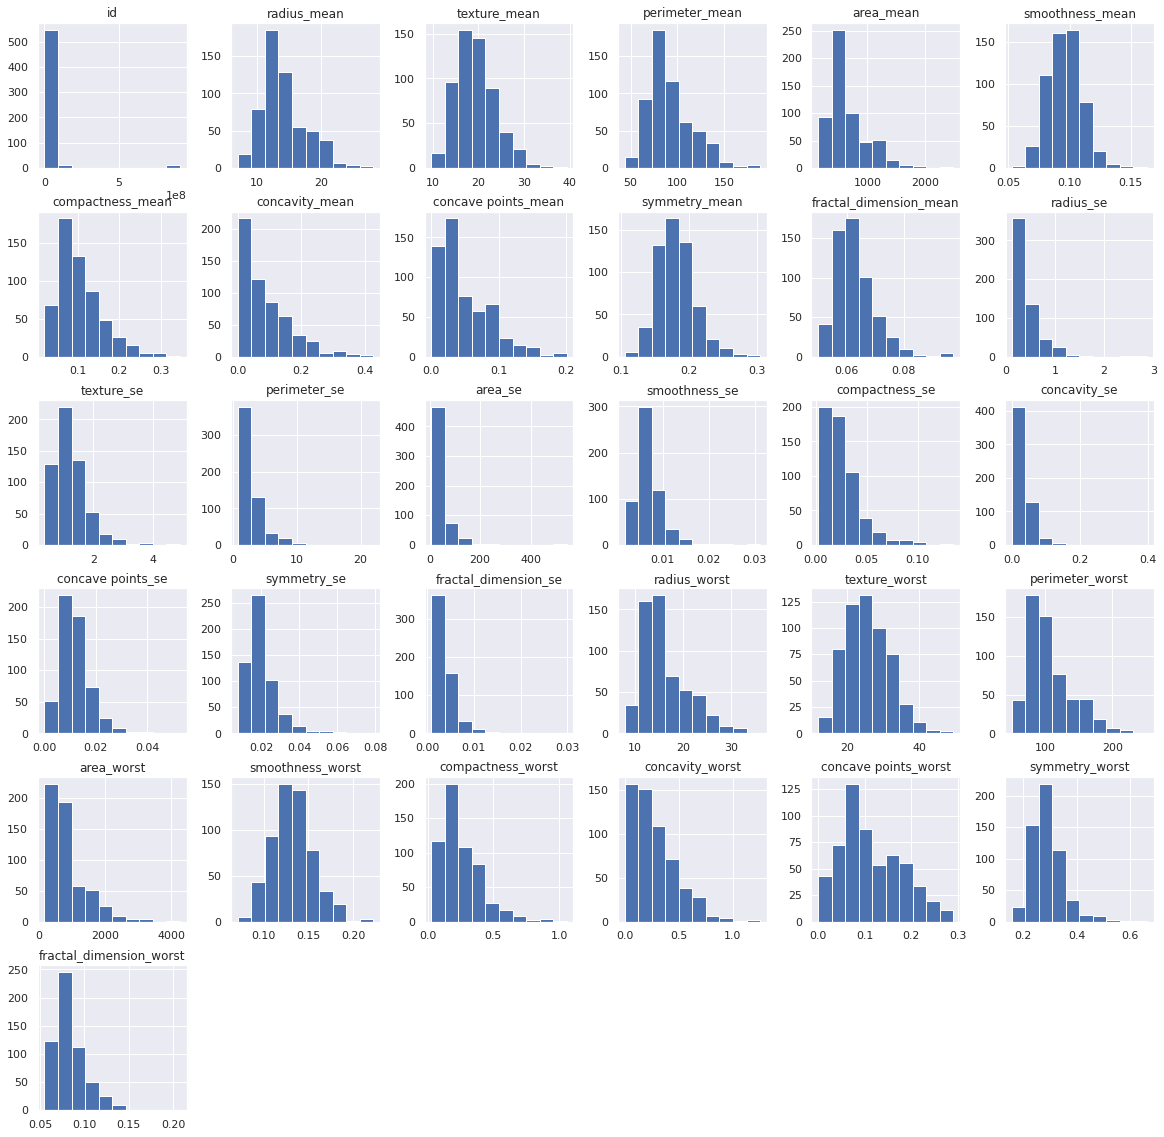

In [6]:
df.hist(figsize=(20, 20))

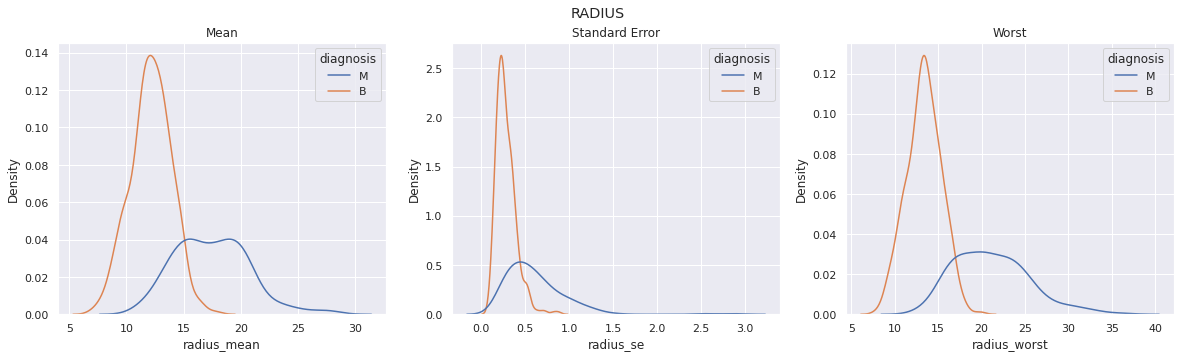

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('RADIUS')
axes[0].set_title('Mean')
axes[1].set_title('Standard Error')
axes[2].set_title('Worst')

sns.kdeplot(ax=axes[0], data=df, x="radius_mean", hue="diagnosis")
sns.kdeplot(ax=axes[1], data=df, x="radius_se", hue="diagnosis")
sns.kdeplot(ax=axes[2], data=df, x="radius_worst", hue="diagnosis")

plt.show()

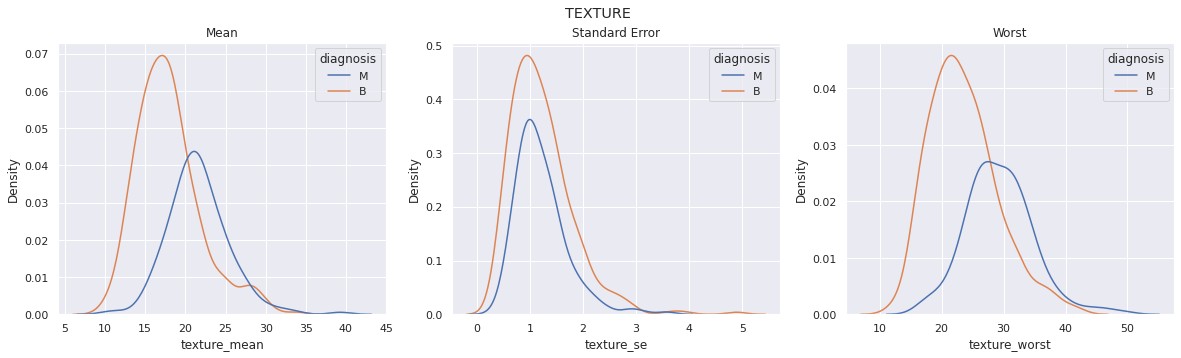

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('TEXTURE')
axes[0].set_title('Mean')
axes[1].set_title('Standard Error')
axes[2].set_title('Worst')

sns.kdeplot(ax=axes[0], data=df, x="texture_mean", hue="diagnosis")
sns.kdeplot(ax=axes[1], data=df, x="texture_se", hue="diagnosis")
sns.kdeplot(ax=axes[2], data=df, x="texture_worst", hue="diagnosis")

plt.show()

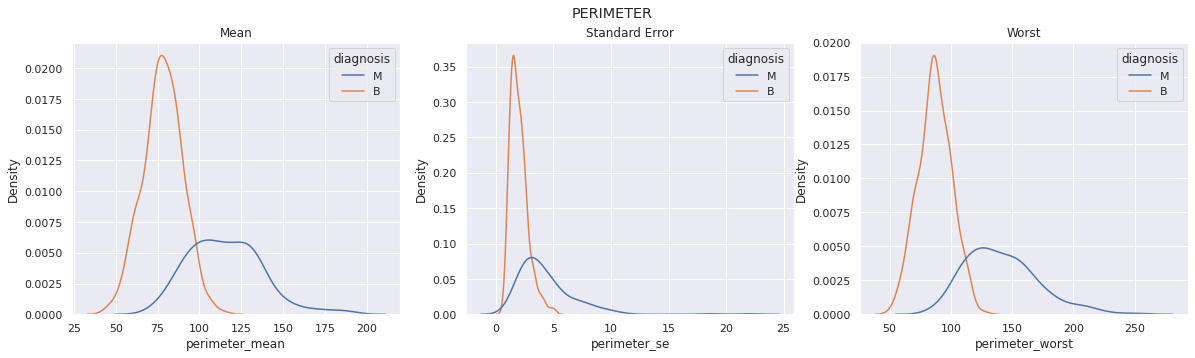

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('PERIMETER')
axes[0].set_title('Mean')
axes[1].set_title('Standard Error')
axes[2].set_title('Worst')

sns.kdeplot(ax=axes[0], data=df, x="perimeter_mean", hue="diagnosis")
sns.kdeplot(ax=axes[1], data=df, x="perimeter_se", hue="diagnosis")
sns.kdeplot(ax=axes[2], data=df, x="perimeter_worst", hue="diagnosis")

plt.show()

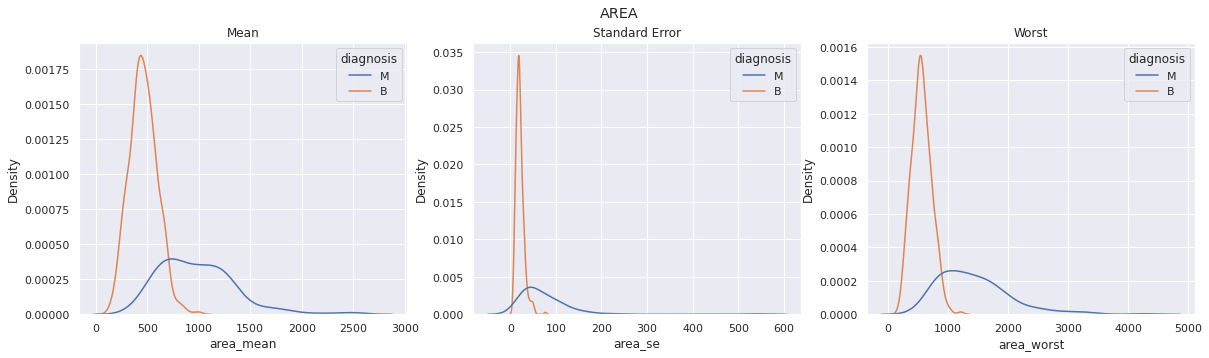

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('AREA')
axes[0].set_title('Mean')
axes[1].set_title('Standard Error')
axes[2].set_title('Worst')

sns.kdeplot(ax=axes[0], data=df, x="area_mean", hue="diagnosis")
sns.kdeplot(ax=axes[1], data=df, x="area_se", hue="diagnosis")
sns.kdeplot(ax=axes[2], data=df, x="area_worst", hue="diagnosis")

plt.show()

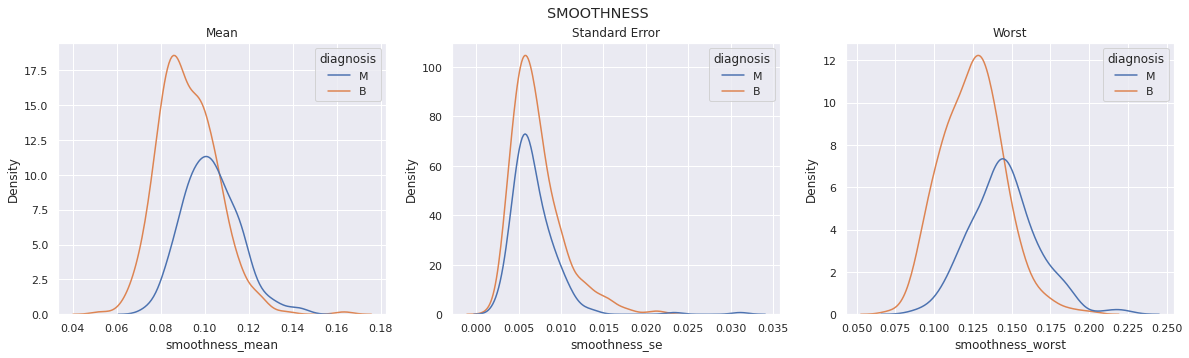

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('SMOOTHNESS')
axes[0].set_title('Mean')
axes[1].set_title('Standard Error')
axes[2].set_title('Worst')

sns.kdeplot(ax=axes[0], data=df, x="smoothness_mean", hue="diagnosis")
sns.kdeplot(ax=axes[1], data=df, x="smoothness_se", hue="diagnosis")
sns.kdeplot(ax=axes[2], data=df, x="smoothness_worst", hue="diagnosis")

plt.show()

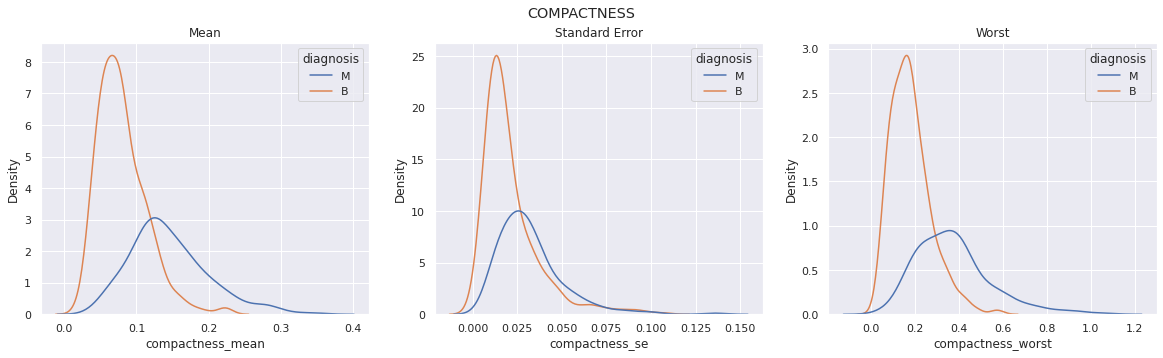

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('COMPACTNESS')
axes[0].set_title('Mean')
axes[1].set_title('Standard Error')
axes[2].set_title('Worst')

sns.kdeplot(ax=axes[0], data=df, x="compactness_mean", hue="diagnosis")
sns.kdeplot(ax=axes[1], data=df, x="compactness_se", hue="diagnosis")
sns.kdeplot(ax=axes[2], data=df, x="compactness_worst", hue="diagnosis")

plt.show()

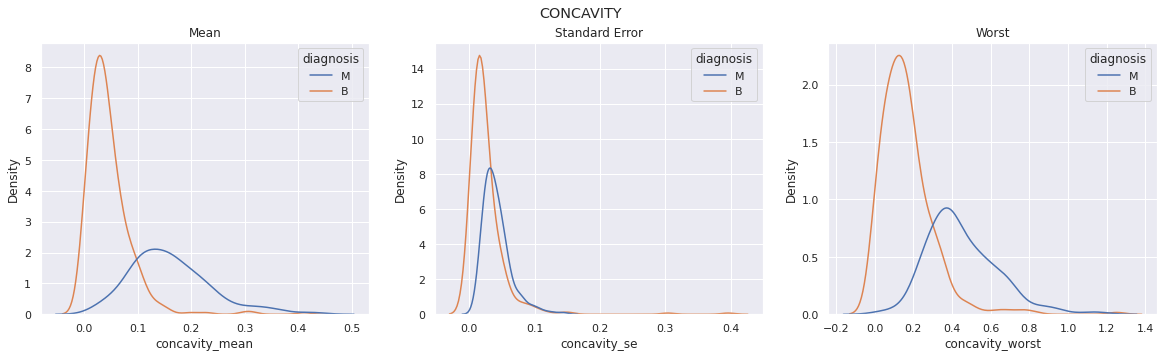

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('CONCAVITY')
axes[0].set_title('Mean')
axes[1].set_title('Standard Error')
axes[2].set_title('Worst')

sns.kdeplot(ax=axes[0], data=df, x="concavity_mean", hue="diagnosis")
sns.kdeplot(ax=axes[1], data=df, x="concavity_se", hue="diagnosis")
sns.kdeplot(ax=axes[2], data=df, x="concavity_worst", hue="diagnosis")

plt.show()

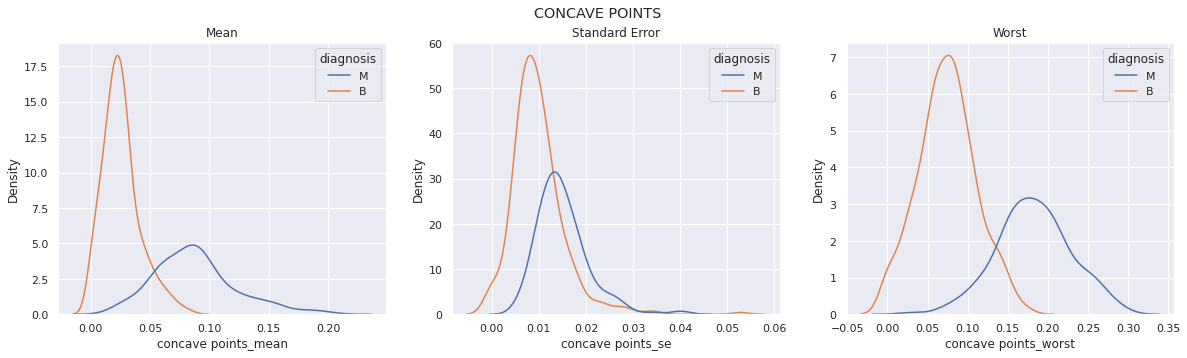

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('CONCAVE POINTS')
axes[0].set_title('Mean')
axes[1].set_title('Standard Error')
axes[2].set_title('Worst')

sns.kdeplot(ax=axes[0], data=df, x="concave points_mean", hue="diagnosis")
sns.kdeplot(ax=axes[1], data=df, x="concave points_se", hue="diagnosis")
sns.kdeplot(ax=axes[2], data=df, x="concave points_worst", hue="diagnosis")

plt.show()

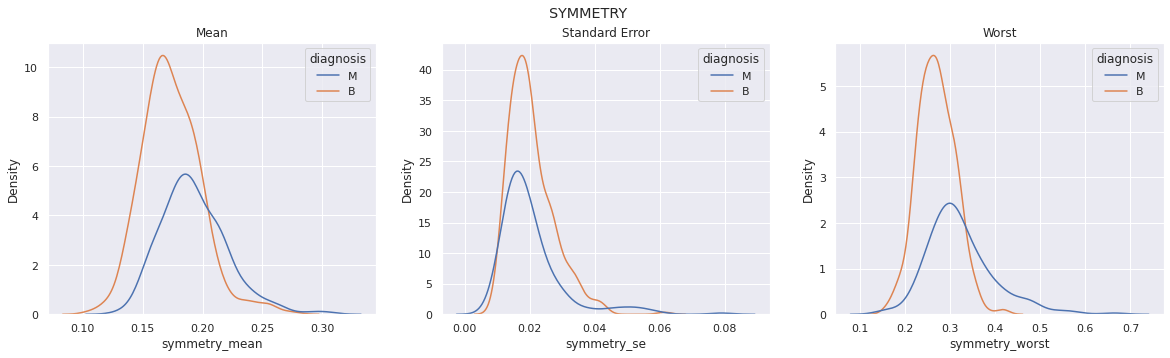

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('SYMMETRY')
axes[0].set_title('Mean')
axes[1].set_title('Standard Error')
axes[2].set_title('Worst')

sns.kdeplot(ax=axes[0], data=df, x="symmetry_mean", hue="diagnosis")
sns.kdeplot(ax=axes[1], data=df, x="symmetry_se", hue="diagnosis")
sns.kdeplot(ax=axes[2], data=df, x="symmetry_worst", hue="diagnosis")

plt.show()

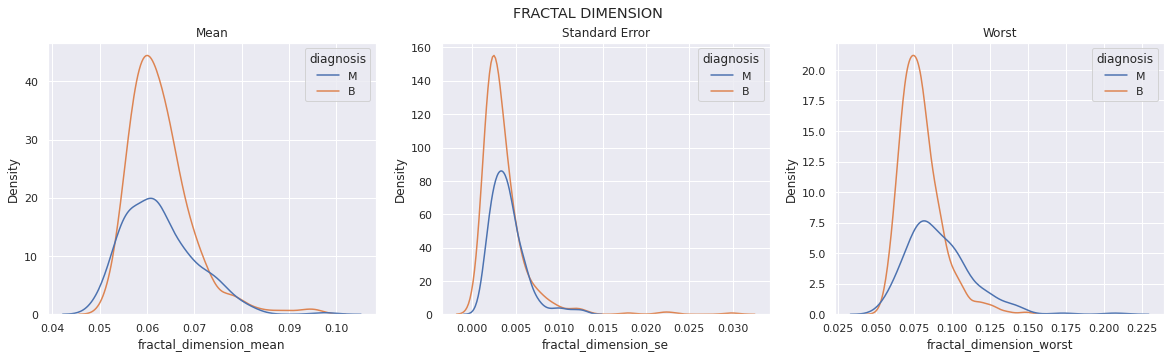

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('FRACTAL DIMENSION')
axes[0].set_title('Mean')
axes[1].set_title('Standard Error')
axes[2].set_title('Worst')

sns.kdeplot(ax=axes[0], data=df, x="fractal_dimension_mean", hue="diagnosis")
sns.kdeplot(ax=axes[1], data=df, x="fractal_dimension_se", hue="diagnosis")
sns.kdeplot(ax=axes[2], data=df, x="fractal_dimension_worst", hue="diagnosis")

plt.show()

## 3. Déclarer le vecteur de caractéristiques et la variable cible

In [17]:
# FRACTAL DIMENSION & ID have no impact
df.drop(columns=['id', 'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst'],
        axis=1,
        inplace=True)

# Features = all columns except DIAGNOSIS
data = df.iloc[:, 1:len(df.columns)-1].copy()
print("Data", data.shape)

Data (569, 26)


In [18]:
# Target = DIAGNOSIS with MALIGNANT = 1 & BENIGN = 0
df['diagnosis'].replace(to_replace = dict(M=1, B=0), inplace = True)
target = df.iloc[:, 0].copy()
print("Target", target.shape)

Target (569,)


In [19]:
# calculate the percentage of ones
print("Percentage of ONES or MALIGNANT :", target.mean(), "\n")

# calculate the percentage of zeros
print("Percentage of ZEROS or BENIGN:", 1 - target.mean(), "\n")


Percentage of ONES or MALIGNANT : 0.37258347978910367 

Percentage of ZEROS or BENIGN: 0.6274165202108963 



## 5. Feature engineering (Ingénierie des fonctionnalités)

Processus de transformation des données brutes en fonctionnalités utiles qui nous aident à mieux comprendre notre modèle et à augmenter sa puissance prédictive.

### Tips : utiliser
* .isnull()
* .sum()  

Nous supposons que des données sont manquantes aléatoirement. Deux méthodes peuvent être utilisées pour imputer les valeurs manquantes. L'une est l'imputation moyenne ou médiane et l'autre est l'imputation par échantillon aléatoire. Lorsqu'il y a des valeurs aberrantes dans l'ensemble de données, nous devrions utiliser l'imputation médiane. Vous pouvez donc utiliser des mécanismes d'imputation médiane parce que l'imputation médiane est robuste aux valeurs aberrantes. L'imputation doit être effectuée sur l'ensemble d'apprentissage, puis propagée vers l'ensemble de test. Cela signifie que les mesures statistiques à utiliser pour remplir les valeurs manquantes à la fois dans le train et dans l'ensemble d'essai doivent être extraites de l'ensemble de train uniquement. Ceci pour éviter le surajustement.

In [20]:
print("Data\n", data.count().isnull())

Data
 radius_mean             False
texture_mean            False
perimeter_mean          False
area_mean               False
smoothness_mean         False
compactness_mean        False
concavity_mean          False
concave points_mean     False
symmetry_mean           False
radius_se               False
texture_se              False
perimeter_se            False
area_se                 False
smoothness_se           False
compactness_se          False
concavity_se            False
concave points_se       False
symmetry_se             False
radius_worst            False
texture_worst           False
perimeter_worst         False
area_worst              False
smoothness_worst        False
compactness_worst       False
concavity_worst         False
concave points_worst    False
dtype: bool


In [21]:
# Dropping the outlier rows with standard deviation
factor = 3

for i in df.columns:
    Xi = df[i]
    #print('\n', i)
    upper_lim = np.mean(Xi) + np.std(Xi) * factor
    #print('UPPER LIM', upper_lim)
    lower_lim = np.mean(Xi) - np.std(Xi) * factor
    #print('LOWER LIM', lower_lim)
    df[i] = Xi[(Xi < upper_lim) & (Xi > lower_lim)]

df = df.dropna()
print("\nData shape", df.shape)



Data shape (498, 28)


## 71 (569 - 498) outliers have been dropped

## 6. Feature scaling

In [22]:
y = np.array(df['diagnosis'])
X = np.array(df.iloc[:, 1:len(df.columns)-1].copy())

SC = StandardScaler()
X = SC.fit_transform(X)

## 4. Divisez les données en un ensemble d'entraînement et de test séparés  


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train", X_train.shape, "y_train", y_train.shape)
print("X_test", X_test.shape, "y_test", y_test.shape)

X_train (398, 26) y_train (398,)
X_test (100, 26) y_test (100,)


## 7. Ajuster le classificateur à l'ensemble d'entraînement

In [24]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
print("TRAIN ACCURACY =", clf.score(X_train, y_train))

TRAIN ACCURACY = 1.0


## 8. Prédire les résultats du test (predict() et predict_proba())

In [26]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

print("TEST ACCURACY =", clf.score(X_test, y_test))

TEST ACCURACY = 0.96


## 9. Vérifiez le score de précision

Comparez la précision du modèle avec une précision nulle. La précision du modèle sur ce jeu de données devrait être très élevée. Mais, nous ne pouvons pas dire que notre modèle est très bon basé seulement sur cette prédiction. Nous devons le comparer avec la précision nulle. La précision nulle est la précision qui pourrait être obtenue en prédisant toujours la classe la plus fréquente. Vous devez donc vérifier la distribution des classes dans l'ensemble de test.

In [27]:
print("TEST PRECISION SCORE =", precision_score(y_test, y_pred).round(4))

TEST PRECISION SCORE = 0.9062


## 10. Reconstruire le modèle de classification kNN en utilisant différentes valeurs de k

Vous pouvez par exemple  augmenter la valeur de k et voir son effet sur la précision.

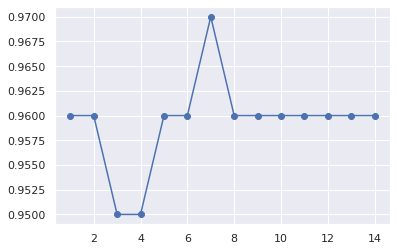

In [28]:
score = []
for k in range(1, 15):
    model = KNeighborsClassifier(k)
    model.fit(X_train, y_train)
    score.append(model.score(X_test, y_test))

plt.plot(range(1,15), score, 'o-')
plt.show()

### ACCURACY is MAXIMUM (97%) for k = 7

## 11. Matrice de confusion

La matrice de confusion vous donnera une image claire de la performance du modèle de classification et des types d'erreurs produites par le modèle. Elle affiche un résumé des prévisions correctes et incorrectes ventilées par catégorie.

CONFUSION MATRIX
 [[70  0]
 [ 3 27]]


<AxesSubplot:>

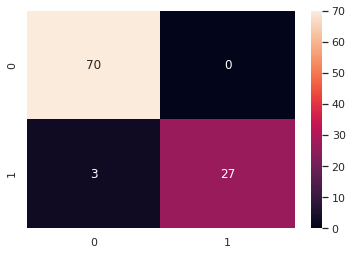

In [29]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX\n", CM)
sns.heatmap(CM, annot=True)

## 12. Métriques de classification

Rapport de classification : affiche les scores de précision, de rappel, de f1 et de support du modèle.


In [30]:
print("CLASSIFICATION REPORT BEGNIN=0 MALIGNANT=1\n\n", classification_report(y_test, y_pred))

CLASSIFICATION REPORT BEGNIN=0 MALIGNANT=1

               precision    recall  f1-score   support

           0       0.96      1.00      0.98        70
           1       1.00      0.90      0.95        30

    accuracy                           0.97       100
   macro avg       0.98      0.95      0.96       100
weighted avg       0.97      0.97      0.97       100



### Results are pretty good but ... 3 False Negative or 3 MALIGNANT patients are predicted BENIGN !  
### UNACCEPTABLE !!!

## 13. ROC - AUC

ROC Curve est un autre outil permettant de mesurer visuellement les performances du modèle de classification. ROC Curve est l'acronyme de Receiver Operating Characteristic Curve. Une courbe ROC est un graphique qui montre les performances d'un modèle de classification à différents niveaux de seuil de classification. La courbe ROC trace le taux de vrais positifs (TPR) par rapport au taux de faux positifs (FPR) à différents niveaux de seuil. Le taux vrai positif (TPR) est également appelé rappel. Il est défini comme le rapport de TP à (TP + FN). Le taux de faux positifs (FPR) est défini comme le rapport entre FP et (FP + TN).
ROC AUC signifie Receiver Operating Characteristic - Area Under Curve. C'est une technique pour comparer les performances du classificateur. Dans cette technique, nous mesurons l'aire sous la courbe (AUC). Un classificateur parfait aura une AUC ROC égale à 1, tandis qu'un classificateur purement aléatoire aura une AUC ROC égale à 0,5.
Ainsi, ROC AUC est le pourcentage du tracé ROC qui se trouve sous la courbe.

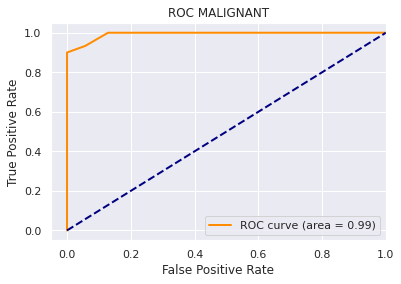

In [31]:
y_pred_proba = KNN.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2

# MALIGNANT trace
plt.plot(fpr, tpr,
         color='darkorange',
         lw=lw,
         label='ROC curve (area = %0.2f)' % roc_auc)

# CHANCE proba=0,5 trace
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC MALIGNANT')

plt.legend(loc="lower right")

plt.show()

## 14. Validation croisée K-Fold

Il s’agit d’une technique de validation croisée pour améliorer les performances du modèle. La validation croisée est une méthode statistique d'évaluation des performances de généralisation. Elle est plus stable et plus approfondie que l'utilisation d'un fractionnement train-test pour évaluer les performances du modèle.

/home/olivier/anaconda3/envs/dev_IA/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


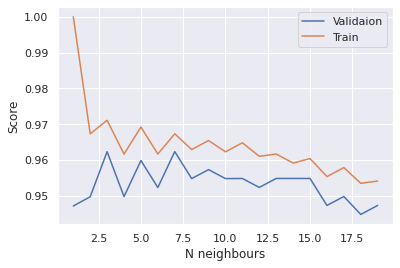

In [32]:
model = KNeighborsClassifier()
k = np.arange(1, 20)

train_score, val_score = validation_curve(model, X_train, y_train,
                                          'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='Validaion')
plt.plot(k, train_score.mean(axis=1), label='Train')

plt.xlabel('N neighbours')
plt.ylabel('Score')
plt.legend()

In [33]:
param_grid = {'n_neighbors': np.arange(1, 20),
             'metric': ['euclidean', 'manhattan', 'minkowski']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [34]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

CLASSIFICATION REPORT BEGNIN=0 MALIGNANT=1

               precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       1.00      0.93      0.97        30

    accuracy                           0.98       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100

CONFUSION MATRIX
 [[70  0]
 [ 2 28]]


<AxesSubplot:>

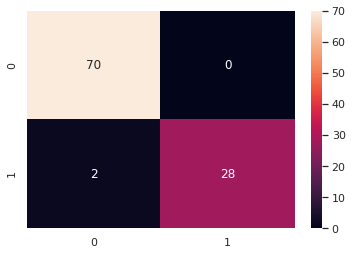

In [35]:
model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("CLASSIFICATION REPORT BEGNIN=0 MALIGNANT=1\n\n", classification_report(y_test, y_pred))
CM = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX\n", CM)
sns.heatmap(CM, annot=True)

## 15. Résultats et conclusion

### With 5 neighbours & MANHATTAN metric, results are very good but ...
### 2 False Negative or 2 MALIGNANT patients are predicted BENIGN !  
### UNACCEPTABLE !!!

## 16. Bonus 1

Implémenter votre propre algorithme KNN.
Vous pouvez vous appuyer sur cette proposition NON OPTIMISEE d'algorithme kNN :
1. Charger les données
2. Initialiser k au nombre de plus proches voisins choisi
3. Pour chaque exemple dans les données :
* 3.1. Calculer la distance entre notre requête et l’observation itérative actuelle de la boucle depuis les données.
* 3.2. Ajouter la distance et l’indice de l’observation concernée à une collection ordonnée de données
4. Trier cette collection ordonnée contenant distances et indices de la plus petite distance à la plus grande (dans ordre croissant)
5. Sélectionner les k premières entrées de la collection de données triées (équivalent aux k plus proches voisins)
6. Obtenir les étiquettes des k entrées sélectionnées
7. 
* Si régression => retourner la moyenne des k étiquettes
* Si classification => retourner le mode (valeur la plus fréquente/commune) des k étiquettes

In [36]:
from math import sqrt

class myKNN():
    def __init__(self, k):
        self.k = k
        print(self.k)
    
    def fit(self, X_train, y_train):
        self.x_train = X_train
        self.y_train = y_train

    def calculate_euclidean(self, sample1, sample2):
        distance=0.0
        for i in range(len(sample1)):
            # Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
            distance += (sample1[i]-sample2[i])**2
        return sqrt(distance)

    def nearest_neighbors(self,test_sample):
        # Calculate distances from a test sample to every sample in a training set
        distances = []
        for i in range(len(self.x_train)):
            distances.append((self.y_train[i], self.calculate_euclidean(self.x_train[i], test_sample)))
        # Sort in ascending order, based on a distance value
        distances.sort(key=lambda x:x[1])
        
        neighbors = []
        for i in range(self.k):
            # Get first k samples
            neighbors.append(distances[i][0])
        return neighbors
      
    def predict(self, test_set):
        predictions = []
        for test_sample in test_set:
            neighbors = self.nearest_neighbors(test_sample)
            labels = [sample for sample in neighbors]
            prediction = max(labels, key=labels.count)
            predictions.append(prediction)
        return predictions
    

5
CLASSIFICATION REPORT BEGNIN=0 MALIGNANT=1

               precision    recall  f1-score   support

           0       0.96      0.99      0.97        70
           1       0.96      0.90      0.93        30

    accuracy                           0.96       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.96      0.96      0.96       100

CONFUSION MATRIX
 [[69  1]
 [ 3 27]]


<AxesSubplot:>

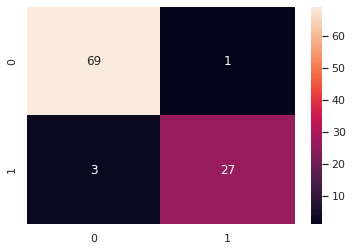

In [37]:
my_model = myKNN(5)
my_model.fit(X_train, y_train)
my_y_pred = my_model.predict(X_test)
print("CLASSIFICATION REPORT BEGNIN=0 MALIGNANT=1\n\n", classification_report(y_test, my_y_pred))
CM = confusion_matrix(y_test, my_y_pred)
print("CONFUSION MATRIX\n", CM)
sns.heatmap(CM, annot=True)

### Scores are not better with myKNN than with sklearn but remain good.

## 17. Bonus 2

Comparer les résultats avec un autre algorithme de classification

CLASSIFICATION REPORT BEGNIN=0 MALIGNANT=1

               precision    recall  f1-score   support

           0       0.98      0.93      0.96        70
           1       0.85      0.97      0.91        30

    accuracy                           0.94       100
   macro avg       0.92      0.95      0.93       100
weighted avg       0.95      0.94      0.94       100

CONFUSION MATRIX
 [[65  5]
 [ 1 29]]


<AxesSubplot:>

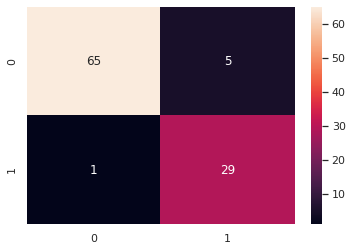

In [38]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
sgdc.fit(X_train, y_train)
y_pred = sgdc.predict(X_test)
print("CLASSIFICATION REPORT BEGNIN=0 MALIGNANT=1\n\n", classification_report(y_test, y_pred))
CM = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX\n", CM)
sns.heatmap(CM, annot=True)

### K Nearest Neighbors model remains BETTER than Stochastic Gradient Descent  but only 1 false negative ...